<a href="https://colab.research.google.com/github/Moh-Nafi/Neural_Network_Projects/blob/main/CNN_Image_Classification_Model/convnets_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Setup

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.autograph.set_verbosity(0)

import keras
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.12.0
Keras version: 2.12.0


## Downloading the data

The dataset we'll be working with, known as the "cats vs. dogs" dataset, is not included in the standard Keras library. It was originally made available by Kaggle.com for a computer vision competition in late 2013 when convolutional neural networks (convnets) were not yet widely adopted.

You can obtain the original dataset by downloading it from the following link:
https://www.kaggle.com/c/dogs-vs-cats/data

The dataset comprises medium-resolution color JPEG images, which we will use for our classification task. These images depict examples of cats and dogs, and they have the following appearance:

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)



The original dataset comprises **25,000** images of dogs and cats, equally divided between the two classes, with a total compressed size of 543MB. However, for our purposes, we will work with a smaller subset of only **4000** images. Once we download and decompress the dataset, we will organize it into three distinct subsets: a training set containing 1000 samples from each class, a validation set with 500 samples from each class, and a test set also containing 500 samples from each class.

Below, you can find the code to accomplish this task:

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

# Note: This is a very large dataset and will take time to download
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-08-01 14:53:20--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.212.72.155, 2600:1407:3c00:7a4::317f, 2600:1407:3c00:792::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.212.72.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   115MB/s    in 7.0s    

2023-08-01 14:53:27 (113 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



## Downsampling the data into folders
In this lab, we only use 2000 pictures for training (1K cats + 1K dogs), 1000 pictures for validation and 1000 pictures for testing. Also, we put the traning, validation and testing pictures into different folder so that the model can load the data accordingly.

In [ ]:
import shutil
import os

# The path to the directory where the original dataset was uncompressed
original_dataset_dir = '/tmp/PetImages'

# The directory where we will
# store our smaller dataset
base_dir = '/tmp/cats_and_dogs_small'
if os.path.exists(base_dir):
  shutil.rmtree(base_dir)
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "Cat", fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "Cat", fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to test_cats_dir
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "Cat", fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy first 1000 dog images to train_dogs_dir
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "Dog", fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to validation_dogs_dir
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "Dog", fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to test_dogs_dir
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "Dog", fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

The 666th cat picture is corrupted with size 0, so we replace it with 2001st cat picture.

In [ ]:
! ls -lhrt /tmp/cats_and_dogs_small/train/cats/666.jpg

shutil.copyfile('/tmp/PetImages/Cat/2001.jpg', '/tmp/cats_and_dogs_small/train/cats/666.jpg')

! ls -lhrt /tmp/cats_and_dogs_small/train/cats/666.jpg

-rw-r--r-- 1 root root 0 Aug  1 14:53 /tmp/cats_and_dogs_small/train/cats/666.jpg
-rw-r--r-- 1 root root 21K Aug  1 14:53 /tmp/cats_and_dogs_small/train/cats/666.jpg


As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



So we have indeed 2000 training images, and then 1000 validation images and 1000 test images. In each split, there is the same number of
samples from each class: this is a balanced binary classification problem, which means that classification accuracy will be an appropriate
measure of success.

## Data preprocessing

In order for a computer to process data effectively, the data needs to be formatted into appropriately pre-processed floating-point tensors before being fed into our neural network. Currently, our data exists as JPEG files on the disk, and the steps to prepare it for the network are as follows:

1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert the pixel grids into floating-point tensors.
4. Rescale the pixel values, which originally range from 0 to 255, to the [0, 1] interval. This rescaling is preferred for neural networks, which tend to perform better with smaller input values.

Although this process may seem complex, Keras provides utilities that handle these steps automatically. Keras has a module called `keras.preprocessing.image` that contains helpful image processing tools. One crucial class in this module is `ImageDataGenerator`, which enables us to set up Python generators that can efficiently convert image files on the disk into batches of pre-processed tensors.

To leverage this functionality, we use flow_from_directory, a method from ImageDataGenerator. By using this method, we can load images from the specified train_dir and validation_dir, resize them to 150 x 150 pixels (height, width), and organize them into batches of 20 images at a time.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Generator for data preprocessing.
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)
validation_generator = validation_datagen.flow_from_directory(
     train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
               )

Found 1000 images belonging to 2 classes.


In [ ]:
test_dir

'/tmp/cats_and_dogs_small/test'

Let's take a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape `(20, 150, 150, 3)`) and binary
labels (shape `(20,)`). 20 is the number of samples in each batch (the batch size). Note that the generator yields these batches
indefinitely: it just loops endlessly over the images present in the target folder. For this reason, we need to `break` the iteration loop
at some point.

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


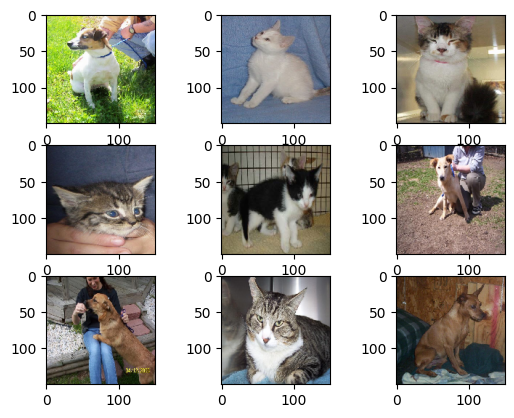

In [ ]:
from matplotlib import pyplot
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(data_batch[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

This code encodes cat label to 0 and dog label to 1

In [ ]:
labels_batch[:9]

array([1., 0., 0., 0., 0., 1., 1., 0., 1.], dtype=float32)

## Building our network

Our convnet will be a stack of alternated `Conv2D` (with `relu` activation) and `MaxPooling2D` layers.  
[Doc](https://keras.io/api/layers/convolution_layers/convolution2d/) for `Conv2D`  
[Doc](https://keras.io/api/layers/pooling_layers/max_pooling2d/) for `MaxPooling2D`


However, since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger: it will have one
more `Conv2D` + `MaxPooling2D` stage. This serves both to augment the capacity of the network, and to further reduce the size of the
feature maps, so that they aren't overly large when we reach the `Flatten` layer. Here, since we start from inputs of size 150x150 (a
somewhat arbitrary choice), we end up with feature maps of size 7x7 right before the `Flatten` layer. For each `Conv2D` layer, we used `kernel_size` of (3, 3), which means the reception field is 3 pixel by 3 pixel, and various number of the filters of the same size at different stage.

Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is
decreasing (from 148x148 to 7x7). This is a pattern that you will see in almost all convnets.

Since we are attacking a binary classification problem, we are ending the network with a single unit (a `Dense` layer of size 1) and a
`sigmoid` activation. This unit will encode the probability that the network is looking at one class or the other.

In [ ]:
from keras import layers
from keras import models

# Create a CNN with 4 convolution layers followed by a flatten layer and a fully connected hidden layer.
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size= (3,3),activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size= (3,3),activation = 'relu',))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(filters = 128, kernel_size= (3,3),activation = 'relu',))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(filters = 128, kernel_size= (3,3),activation = 'relu',))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation= 'relu'))
model.add(layers.Dense(1,activation= 'sigmoid')) # binary dense 1

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

For our compilation step, we'll go with the `RMSprop` optimizer as usual. Since we ended our network with a single sigmoid unit, we will use binary crossentropy as our loss. `RMSprop` means Root Mean Squared Propagation. It uses decaying moving average which allows the algorithm to forget early gradients and focus on the most recently observed partial gradients seen during the progress of the search

In [ ]:
# Model compile with loss and optimizer
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              metrics = ['accuracy']
              )

Let's fit our model to the data using the generator. We do it using the `fit_generator` method, the equivalent of `fit` for data generators like ours. It expects as the first argument a Python generator that will yield batches of inputs and targets indefinitely, just like ours does. Since the data is generated endlessly, the generator needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the `steps_per_epoch` argument: after drawing `steps_per_epoch` batches from the generator (equivalent to running `steps_per_epoch` gradient descent steps), the fitting process will proceed to the next epoch. In our case, batches consist of 20 samples, so it will take 100 batches to reach our target of 2000 samples.

When using `fit_generator`, you may also pass a `validation_data` argument, similar to the `fit` method. Importantly, this argument can be either a data generator itself or a tuple of Numpy arrays. If you use a generator as `validation_data`, the generator is expected to yield batches of validation data endlessly. In this case, you should also specify the `validation_steps` argument, which indicates how many batches of validation data should be drawn from the generator.

In [ ]:
# Train model for 30 epochs

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
    )

Epoch 1/30
100/100 [==============================] - 22s 80ms/step - loss: 0.7523 - accuracy: 0.5240 - val_loss: 0.6905 - val_accuracy: 0.6090
Epoch 2/30
100/100 [==============================] - 6s 63ms/step - loss: 0.6893 - accuracy: 0.5550 - val_loss: 0.6819 - val_accuracy: 0.6440
Epoch 3/30
100/100 [==============================] - 8s 76ms/step - loss: 0.6643 - accuracy: 0.6070 - val_loss: 0.6697 - val_accuracy: 0.5750
Epoch 4/30
100/100 [==============================] - 10s 104ms/step - loss: 0.6173 - accuracy: 0.6675 - val_loss: 0.6289 - val_accuracy: 0.6700
Epoch 5/30
100/100 [==============================] - 7s 67ms/step - loss: 0.5645 - accuracy: 0.7095 - val_loss: 0.4803 - val_accuracy: 0.7520
Epoch 6/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5172 - accuracy: 0.7555 - val_loss: 0.5085 - val_accuracy: 0.7450
Epoch 7/30
100/100 [==============================] - 8s 81ms/step - loss: 0.4630 - accuracy: 0.7870 - val_loss: 0.3937 - val_accuracy: 0.8

It is good practice to always save your models after training:

In [ ]:
model.save('cats_and_dogs_small_1.h5')

Let's plot the loss and accuracy of the model over the training and validation data during training:

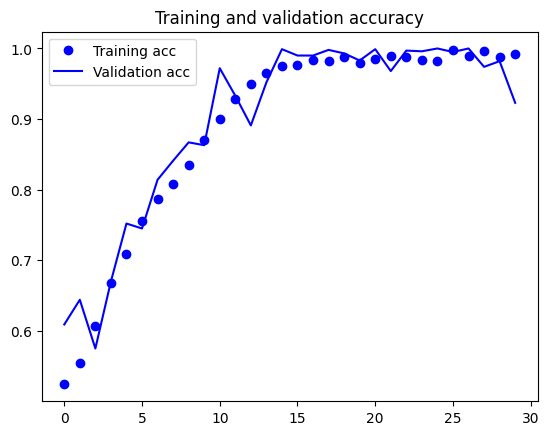

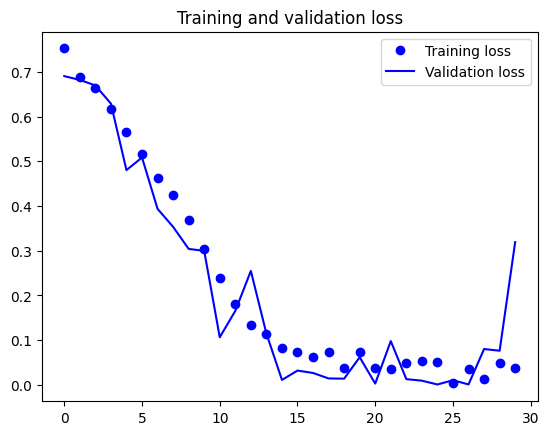

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#  Evaluating model performance
model.evaluate_generator(test_generator,50)

[3.44301700592041, 0.7049999833106995]


The observed plots exhibit a classic overfitting pattern. During training, the accuracy steadily improves and eventually approaches 100%, while the validation accuracy plateaus at approximately 70%.

As we have a limited number of training samples (only 2000), overfitting becomes a primary concern. While various techniques like dropout and weight decay can help address overfitting, we will adopt a specific approach for computer vision tasks: **`data augmentation`**.

# Data Augmentation

Overfitting occurs when we have too few training samples, making it challenging for the model to generalize well to new data. Imagine if we had an infinite amount of data; the model would learn from all possible scenarios, and overfitting wouldn't happen. Data augmentation comes to the rescue by creating more training data from the existing samples. It does this by randomly transforming the images, making them look slightly different each time. This way, the model never sees the exact same picture during training, gaining exposure to a diverse range of examples and improving its ability to handle new data.

In `Keras`, we can easily implement data augmentation by setting up some random transformations using the `ImageDataGenerator` tool. Let's dive into a simple example to see how it works!

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

These are just few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures
vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal
asymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Let's take a look at our augmented images:

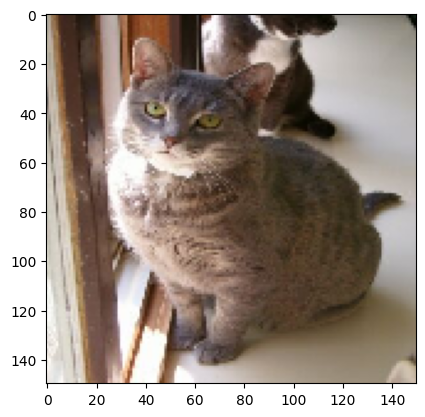

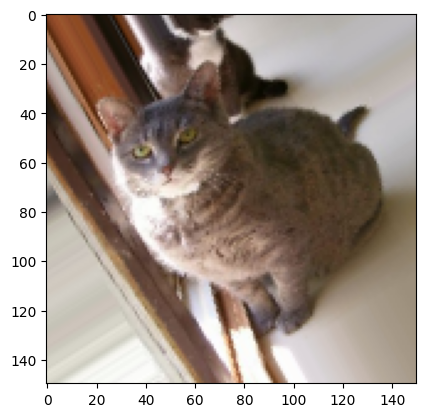

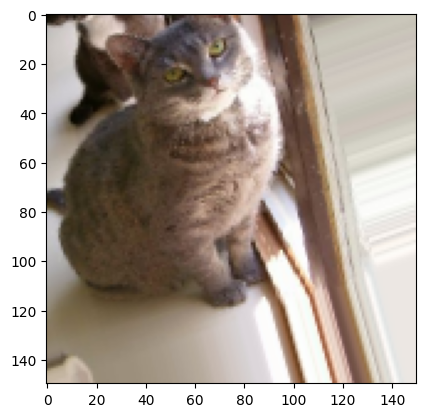

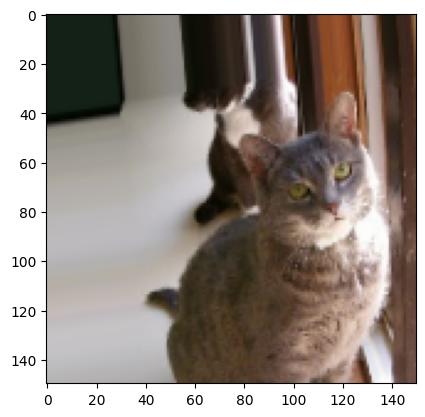

In [ ]:
# This is the module with image preprocessing utilities
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[0]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

plt.figure(0)
plt.imshow(img)

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 1
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


By training a new network with this data augmentation setup, our model will never encounter the same input twice. However, the inputs it does see are still closely related because they originate from a limited number of original images. Data augmentation enables us to remix existing information rather than generating entirely new information. While it helps reduce overfitting, it might not completely eliminate it.

To take additional measures against overfitting, we'll incorporate a `Dropout` layer into our model. This layer will be placed right before the densely-connected classifier, serving as a further defense mechanism.

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters = 32, kernel_size= (3,3),activation = 'relu', input_shape = (150,150,3)))
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(filters = 64, kernel_size= (3,3),activation = 'relu'))
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(filters = 128, kernel_size= (3,3),activation = 'relu'))
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(filters = 128, kernel_size= (3,3),activation = 'relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(512,activation= 'relu'))
model2.add(layers.Dense(1,activation= 'sigmoid'))

Let's train our network using data augmentation and dropout:

In [ ]:
# Creating generator for data preprocessing.

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary')


validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)

# Training the model for 30 epochs

model2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy']
              )

model2.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])
history = model2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50
      )

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Epoch 1/30
100/100 [==============================] - 18s 161ms/step - loss: 0.7124 - accuracy: 0.5150 - val_loss: 0.6910 - val_accuracy: 0.6060
Epoch 2/30
100/100 [==============================] - 16s 160ms/step - loss: 0.6939 - accuracy: 0.5395 - val_loss: 0.6827 - val_accuracy: 0.5710
Epoch 3/30
100/100 [==============================] - 17s 170ms/step - loss: 0.6868 - accuracy: 0.5540 - val_loss: 0.6509 - val_accuracy: 0.6630
Epoch 4/30
100/100 [==============================] - 17s 168ms/step - loss: 0.6706 - accuracy: 0.6055 - val_loss: 0.6576 - val_accuracy: 0.5860
Epoch 5/30
100/100 [==============================] - 16s 159ms/step - loss: 0.6476 - accuracy: 0.6345 - val_loss: 0.6485 - val_accuracy: 0.6270
Epoch 6/30
100/100 [==============================] - 16s 158ms/step - loss: 0.6417 - accuracy: 0.6220 - val_loss: 0.5515 - val_accuracy: 0.7190
Epoch 7/30
100/100 [==============================] - 16s 158ms/step - loss: 0.6268 - accuracy: 0.6655 - val_loss: 0.6064 - val_ac

Let's save our model -- we will be using it in the section on convnet visualization.

In [ ]:
model2.save('cats_and_dogs_small_2.h5')

Let's plot our results again:

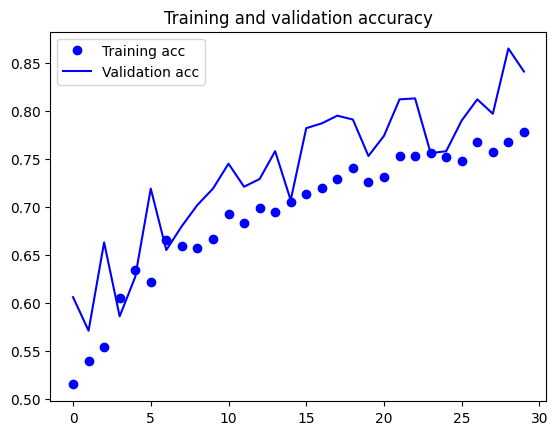

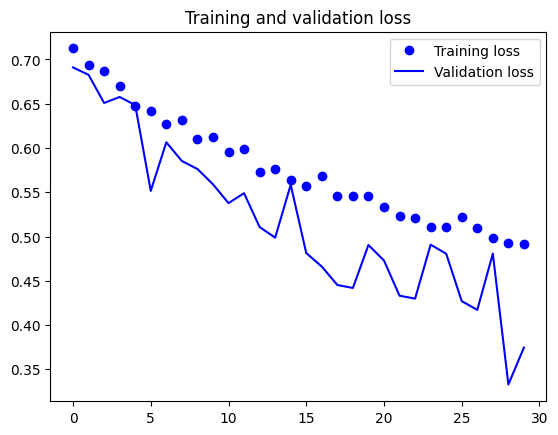

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
 # model performance
 model2.evaluate_generator(test_generator,50)

[0.46843478083610535, 0.7739999890327454]

Thanks to data augmentation and dropout, we are no longer overfitting: the training curves are rather closely tracking the validation
curves. We are now able to reach an accuracy closer to 80%.

By leveraging regularization techniques even further and by `tuning the network's parameters` (such as the number of filters per convolution
layer, or the number of layers in the network), we may be able to get an even better accuracy, likely up to 86-87%. However, it would prove
very difficult to go any higher just by training our own convnet from scratch, simply because we have so little data to work with.

As a
next step to improve our accuracy on this problem, we will have to leverage a pre-trained model.
A pre-trained model is a pre-built neural network that has been trained on a large dataset for a specific task, typically using a substantial amount of computational resources and time.

In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")